In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# IMPORTS
import csv
import os
# Import the necessaries libraries
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from datetime import timedelta

from numpy import pi
from scipy.fftpack import fft, fftfreq

# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [2]:
# path_C2100 = './tides-data-wpafup/'

path_C2100 = 'C:/Users/Pedro/Downloads/Artigosexta/Data_Tid/data/'

data = {}

# math_a = []

list = os.listdir(path_C2100)

column_names = ['Samples number','Period [s]','g [m/s^2]','Velocity [m/s]','Temperature [ºC]']

In [5]:
cte_len=14*10**(-6)
l_ori = 8.1385+0.0505
t_ori = 25.0
final_data = []
mean = 0
for i in range(len(list)):
    path = os.path.join(path_C2100+str(list[i]))
#     print(path)
    # data_C1 = pd.read_csv(str(os.path.join(path + '/F' + list[i][-4:] + 'CH1.csv')), sep=',', usecols = [3,4], names=column_names, header=None)
    data_C2 = pd.read_csv(str(os.path.join(path)), sep=',', usecols = [0,1,2,3,4], names=column_names, header=0)
    data[list[i]] = data_C2
    
    end_time= pd.to_datetime(list[i][:-4],format='%Y-%m-%d %H_%M_%S')
    
#     por_0 = 1
#     while por_0 == 1:
#         if i > 0 and  end_time - perv_end_time > timedelta(minutes = 7):
# #             print (end_time)
# #             print (perv_end_time)
#             end_time_0 = perv_end_time + timedelta(minutes = 6)
#             t_aver = 0
#             g_aver = 0
#             vel_aver = 0
#             per_aver = 0
#             std_g = 0
#             std_t = 0
#             number = 1
#             g_corr = 0
#             final_data.append({"std_t":std_t,"std_g":std_g,"temperature_average (c)":t_aver,"gravity_average (m/s2)":g_aver,\
#                                 "velocity_average (m/s)":vel_aver,"period_average (s)":per_aver,"samples":number,\
#                                 "gravity_corr (m/s2)":g_corr,"time":end_time_0})
#             perv_end_time = end_time_0
#         else:
#             por_0 = 0
    
    
    
    number = 1
    t_aver = 0
    g_aver = 0
    vel_aver = 0
    std_g = 0
    std_t = 0
    for j,v in enumerate(data[list[i]]['Period [s]']):
        
        if data[list[i]]['Period [s]'][j] < 4:
            print(end_time)
            pass
        else:
            t_aver += data[list[i]]['Temperature [ºC]'][j]
            g_aver += data[list[i]]['g [m/s^2]'][j]
            vel_aver += data[list[i]]['Velocity [m/s]'][j]
            per_aver += data[list[i]]['Period [s]'][j]
            number += 1
    t_aver = t_aver/number
    g_aver = g_aver/number
    vel_aver = vel_aver/number
    per_aver = per_aver/number
            
    
#     t_aver=sum(data[list[i]]['Temperature [ºC]'])/len(data[list[i]]['Temperature [ºC]'])
#     g_aver=sum(data[list[i]]['g [m/s^2]'])/len(data[list[i]]['g [m/s^2]'])
#     vel_aver=sum(data[list[i]]['Velocity [m/s]'])/len(data[list[i]]['Velocity [m/s]'])
#     per_aver=sum(data[list[i]]['Period [s]'])/len(data[list[i]]['Period [s]'])
    std_g=np.std(data[list[i]]['g [m/s^2]'], ddof=1) / np.sqrt(np.size(data[list[i]]['g [m/s^2]']))
    std_t=np.std(data[list[i]]['Temperature [ºC]'], ddof=1) / np.sqrt(np.size(data[list[i]]['Temperature [ºC]']))
#     print(np.std(data[list[i]]['Temperature [ºC]'], ddof=1))
#     print(np.sqrt(np.size(data[list[i]]['Temperature [ºC]'])))
#     if g_aver > 10:
#         g_aver = sum(data[list[i-1]]['g [m/s^2]'])/len(data[list[i-1]]['g [m/s^2]'])
#         per_aver = sum(data[list[i-1]]['Period [s]'])/len(data[list[i-1]]['Period [s]'])
        
    length_corr = l_ori+l_ori*cte_len*(t_aver-t_ori)
    g_corr = (4*(3.1415926**2)*length_corr/(float(per_aver)**2))
#     if (i <20):
#         print(length_corr)
#         print(g_corr)
    while True:
        if i> 0 and end_time-end_time_p>timedelta(minutes = 7):
#             print (i)
            end_time_c = end_time_p + timedelta(minutes = 6)
            final_data.append({"std_t":0,"std_g":0,"temperature_average (c)":0,"gravity_average (m/s2)":0,\
                                "velocity_average (m/s)":0,"period_average (s)":0,"samples":0,\
                                "gravity_corr (m/s2)":0,"time":end_time_c})
            end_time_p = end_time_c 
        else:
            break
    end_time_p = end_time
    
    mean  += g_corr
    
    final_data.append({"std_t":std_t,"std_g":std_g,"temperature_average (c)":t_aver,"gravity_average (m/s2)":g_aver,\
        "velocity_average (m/s)":vel_aver,"period_average (s)":per_aver,"samples":number,\
        "gravity_corr (m/s2)":g_corr,"time":end_time})
    perv_end_time = end_time

mean_no_zeros = mean/len(list)
    
print(mean)
    
    

2022-08-20 20:00:24
91618.5498852011


In [6]:
print(mean_no_zeros)

9.796679842301229


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
5.744118325744979


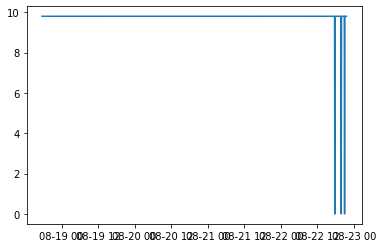

In [7]:
df = pd.DataFrame(final_data)
# plt.plot(df["gravity_average (m/s2)"])
plt.plot(df["time"][5000:6000],df["gravity_corr (m/s2)"][5000:6000])
# plt.xlim(5395,5400)
# plt.ylim(9.1,9.2)
print(type(df["time"][5398]))
# df["gravity_corr (m/s2)"][5398] =df["gravity_corr (m/s2)"][5395]
# df["gravity_corr (m/s2)"]
df.to_csv('Tagus_Pendulum.csv',header = final_data[0].keys(), index= False)
print(df["period_average (s)"][100])

In [8]:
import plotly.express as px

fig = px.scatter(df, x="time", y="gravity_corr (m/s2)")
fig.show()

In [9]:
from datetime import datetime, timedelta

final_data [0]['time']
# for i,v in enumerate(df["time"]):
#     if i> 0 and df["time"][i]-df["time"][i-1]>timedelta(minutes = 7):
#         print(i)
#         print(df["time"][i])
#         print(df["time"][i-1])
        
#         print(df["time"][i]-df["time"][i-1])
        
    

Timestamp('2022-07-28 21:42:24')

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

time_sample = 6  # min * 60 to convert to sec


for b in range(20):
    if 2**b >= len(df["gravity_corr (m/s2)"]):
        print(b-1)
        max_range=2**(b-1)
        break
    else:
        pass
print(max_range)
print(len(df["gravity_corr (m/s2)"]))

move_area = 0

amplitude = np.array(df["gravity_corr (m/s2)"][0+move_area:max_range+move_area])

media = np.mean(amplitude)

amplitude = amplitude - mean_no_zeros

fourierTransform_g = fft(amplitude)/len(amplitude)
n=len(amplitude)

# dt = time_sample

dt = time_sample / (24*60)

freq = fftfreq(n, dt)[:n//2]

# Add traces
fig.add_trace(
    go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2])), name="gravity data"),
    secondary_y=False,
)

amplitude = np.array(df["temperature_average (c)"][0+move_area:max_range+move_area])

fourierTransform_T = fft(amplitude)/len(amplitude)

n=len(amplitude)

dt = time_sample / (24*60)
# dt = time_sample

freq = fftfreq(n, dt)[:n//2] 

fig.add_trace(
    go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_T[1:n//2])/sum(np.abs(fourierTransform_T[1:n//2])), name="temperature"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="IST Full Moon Data ("+str(df["time"][0+move_area])+ ' to ' + str(df["time"][max_range+move_area]) + ')'
)

# Set x-axis title
fig.update_xaxes(title_text="Frequency [1.5] ")

# Set y-axes titles
fig.update_yaxes(title_text="<b>FFT Amp. gravity</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>FFT Amp. temperature</b>", secondary_y=True)
fig.update_xaxes(range = [0.0,2.5])
fig.show()

13
8192
9573


In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

time_sample = 6  # min * 60 to convert to sec


for b in range(20):
    if 2**b >= len(df["gravity_corr (m/s2)"]):
        print(b-1)
        max_range=2**(b-1)
        break
    else:
        pass
max_range = 7365
print(max_range)
print(len(df["gravity_corr (m/s2)"]))

move_area = 0

amplitude = np.array(df["gravity_corr (m/s2)"][0+move_area:max_range+move_area])

# number = 0
# for i in amplitude:
#     mean += i
#     number +=1
# media = mean 
media = np.mean(amplitude)
# print(media)
amplitude = amplitude -mean_no_zeros

fourierTransform_g = fft(amplitude,max_range)/len(amplitude)
n=len(amplitude)

# dt = time_sample

dt = time_sample / (24*60)

freq = fftfreq(n, dt)[:n//2]

# Add traces
fig.add_trace(
    go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2])), name="gravity data"),
    secondary_y=False,
)

amplitude = np.array(df["temperature_average (c)"][0+move_area:max_range+move_area])

fourierTransform_T = fft(amplitude)/len(amplitude)

n=len(amplitude)

dt = time_sample / (24*60)
# dt = time_sample

freq = fftfreq(n, dt)[:n//2] 

fig.add_trace(
    go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_T[1:n//2])/sum(np.abs(fourierTransform_T[1:n//2])), name="temperature"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="IST Full Moon Data ("+str(df["time"][0+move_area])+ ' to ' + str(df["time"][max_range+move_area]) + ')'
)

# Set x-axis title
fig.update_xaxes(title_text="Frequency [1/day] ")

# Set y-axes titles
fig.update_yaxes(title_text="<b>FFT Amp. gravity</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>FFT Amp. temperature</b>", secondary_y=True)
fig.update_xaxes(range = [0.0,5])
fig.show()

13
7365
9573


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

time_sample = 6  # min * 60 to convert to sec


for b in range(20):
    if 2**b >= len(df["gravity_corr (m/s2)"]):
        print(b-1)
        max_range=2**(b-1)
        break
    else:
        pass
max_range = int(745*12.5)
print(max_range)
print(len(df["gravity_corr (m/s2)"]))

move_area = 0

amplitude = np.array(df["gravity_corr (m/s2)"][0+move_area:max_range+move_area])


mean = np.mean(amplitude)

amplitude = amplitude - mean_no_zeros


fourierTransform_g = fft(amplitude,max_range)/len(amplitude)
n=len(amplitude)

# dt = time_sample

dt = time_sample / (24*60)

freq = fftfreq(n, dt)[:n//2]

# Add traces
fig.add_trace(
    go.Bar(x=freq[:], y=2.0/n * np.abs(fourierTransform_g[:n//2])/sum(np.abs(fourierTransform_g[:n//2]))),
    secondary_y=False,
)

amplitude = np.array(df["temperature_average (c)"][0+move_area:max_range+move_area])

fourierTransform_T = fft(amplitude)/len(amplitude)

n=len(amplitude)

dt = time_sample / (24*60)
# dt = time_sample

freq = fftfreq(n, dt)[:n//2] 



occorrencia_1 = 31 
occorrencia_193 = 59

occorrencia_2 = 63
power = 2.0/n * np.abs(fourierTransform_g[:n//2])/sum(np.abs(fourierTransform_g[:n//2]))

fig.add_trace(
    go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_T[1:n//2])/sum(np.abs(fourierTransform_T[1:n//2]))),
    secondary_y=True,
)

# fig.add_trace(
#     go.Bar(x=freq[occorrencia_193], y=2.0/n * np.abs(fourierTransform_g[occorrencia_193])/sum(np.abs(fourierTransform_g[occorrencia_193])), name="1.93"),
#     secondary_y=True,
# )

# fig.add_trace(
#     go.Bar(x=freq[occorrencia_2], y=2.0/n * np.abs(fourierTransform_g[occorrencia_2])/sum(np.abs(fourierTransform_g[occorrencia_2])), name="2"),
#     secondary_y=True,
# )

# Add figure title
fig.update_layout(
    title_text="IST Full Moon Data ("+str(df["time"][0+move_area])+ ' to ' + str(df["time"][max_range+move_area]) + ')'
)

# Set x-axis title
fig.update_xaxes(title_text="Frequency [1/day] ")

# Set y-axes titles
fig.update_yaxes(title_text="<b>FFT Amp. gravity</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>FFT Amp. temperature</b>", secondary_y=True)
fig.update_xaxes(range = [0.0,5])
fig.show()

13
9312
9573


In [13]:
mean

9.564179024661184

In [14]:

import plotly.graph_objects as go

colors = ['#1f77b4',] * int(n//2)

occorrencia_1 = 39
occorrencia_193 = 75
occorrencia_2 = 78

colors[occorrencia_1] = 'crimson'
colors[occorrencia_193] = 'crimson'
colors[occorrencia_2] = 'crimson'
# colors[130] = 'crimson'
colors[262] = 'crimson'
colors[524] = 'crimson'
power_2 = 2.0/n * np.abs(fourierTransform_g[:n//2])/sum(np.abs(fourierTransform_g[:n//2]))

fig = go.Figure(data=[go.Bar(x=freq[:], y=power_2[:],
    marker_color=colors # marker color can be a single color value or an iterable
)])

# fig.add_trace(go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2])),
#                 base=0,
#                 marker_color='lightslategrey',
#                 name='revenue'
#                 ))

fig.update_layout(
    title_text="IST Full Moon Data ("+str(df["time"][0+move_area])+ ' to ' + str(df["time"][max_range+move_area]) + ')'
)

# Set x-axis title
fig.update_xaxes(title_text="Frequency [1/day] ")

# Set y-axes titles
fig.update_yaxes(title_text="<b>FFT Amp. gravity</b>")
# fig.update_yaxes(title_text="<b>FFT Amp. temperature</b>", secondary_y=True)

fig.update_xaxes(range = [0.01,5])
# fig.update_yaxes(range = [0,2.5*10**(-9)])
fig.show()

In [15]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

time_sample = 6  # min * 60 to convert to sec


for b in range(20):
    if 2**b >= len(df["gravity_average (m/s2)"]):
        print(b-1)
        max_range=2**(b-1)
        break
    else:
        pass
max_range = int(745*12.5)
print(max_range)
print(len(df["gravity_average (m/s2)"]))

move_area = 0

amplitude = np.array(df["gravity_average (m/s2)"][0+move_area:max_range+move_area])


mean = np.mean(amplitude)

amplitude = amplitude - mean_no_zeros


fourierTransform_g = fft(amplitude,max_range)/len(amplitude)
n=len(amplitude)

# dt = time_sample

dt = time_sample / (24*60)

freq = fftfreq(n, dt)[:n//2]

# Add traces
fig.add_trace(
    go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2]))),
    secondary_y=False,
)

amplitude = np.array(df["temperature_average (c)"][0+move_area:max_range+move_area])

fourierTransform_T = fft(amplitude)/len(amplitude)

n=len(amplitude)

dt = time_sample / (24*60)
# dt = time_sample

freq = fftfreq(n, dt)[:n//2] 



occorrencia_1 = 31 
occorrencia_193 = 59

occorrencia_2 = 63
power = 2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2]))

fig.add_trace(
    go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_T[1:n//2])/sum(np.abs(fourierTransform_T[1:n//2]))),
    secondary_y=True,
)

# fig.add_trace(
#     go.Bar(x=freq[occorrencia_193], y=2.0/n * np.abs(fourierTransform_g[occorrencia_193])/sum(np.abs(fourierTransform_g[occorrencia_193])), name="1.93"),
#     secondary_y=True,
# )

# fig.add_trace(
#     go.Bar(x=freq[occorrencia_2], y=2.0/n * np.abs(fourierTransform_g[occorrencia_2])/sum(np.abs(fourierTransform_g[occorrencia_2])), name="2"),
#     secondary_y=True,
# )

# Add figure title
fig.update_layout(
    title_text="IST Full Moon Data ("+str(df["time"][0+move_area])+ ' to ' + str(df["time"][max_range+move_area]) + ')'
)

# Set x-axis title
fig.update_xaxes(title_text="Frequency [1/day] ")

# Set y-axes titles
fig.update_yaxes(title_text="<b>FFT Amp. gravity</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>FFT Amp. temperature</b>", secondary_y=True)
fig.update_xaxes(range = [0.0,5])
fig.show()

13
9312
9573


In [16]:

import plotly.graph_objects as go

colors = ['#1f77b4',] * int(n//2)

occorrencia_1 = 39
occorrencia_193 = 75
occorrencia_2 = 78

colors[occorrencia_1] = 'crimson'
colors[occorrencia_193] = 'crimson'
colors[occorrencia_2] = 'crimson'
# colors[130] = 'crimson'
colors[262] = 'crimson'
colors[524] = 'crimson'
power_2 = 2.0/n * np.abs(fourierTransform_g[:n//2])/sum(np.abs(fourierTransform_g[:n//2]))

fig = go.Figure(data=[go.Bar(x=freq[:], y=power_2[:],
    marker_color=colors # marker color can be a single color value or an iterable
)])

# fig.add_trace(go.Bar(x=freq[1:], y=2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2])),
#                 base=0,
#                 marker_color='lightslategrey',
#                 name='revenue'
#                 ))

fig.update_layout(
    title_text="IST Full Moon Data ("+str(df["time"][0+move_area])+ ' to ' + str(df["time"][max_range+move_area]) + ') No Correction'
)

# Set x-axis title
fig.update_xaxes(title_text="Frequency [1/day] ")

# Set y-axes titles
fig.update_yaxes(title_text="<b>FFT Amp. gravity</b>")
# fig.update_yaxes(title_text="<b>FFT Amp. temperature</b>", secondary_y=True)

fig.update_xaxes(range = [0.1,5])
fig.update_yaxes(range = [0,0.3*10**(-6)])
fig.show()

In [17]:
power_2 = 2.0/n * np.abs(fourierTransform_g[:n//2])/sum(np.abs(fourierTransform_g[:n//2]))
print(power_2[0])
len(freq)

1.827904796473223e-06


4656

(0.0, 2.2e-06)

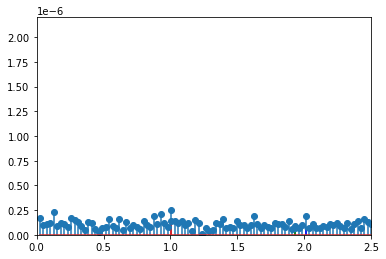

In [18]:
markerline, stemlines, baseline =plt.stem(freq[1:],2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2])))
power = 2.0/n * np.abs(fourierTransform_g[1:n//2])/sum(np.abs(fourierTransform_g[1:n//2]))
markerline, stemlines, baseline =plt.stem(freq[occorrencia_1],power[occorrencia_1],linefmt='red')
markerline, stemlines, baseline =plt.stem(freq[occorrencia_193],power[occorrencia_193],linefmt='green')
markerline, stemlines, baseline =plt.stem(freq[occorrencia_2],power[occorrencia_2],linefmt='blue')
plt.setp(markerline, markersize = 3)
plt.xlim(0,2.5)
plt.ylim(0,2.2*10**(-6))

In [19]:
fourierTransform_g

array([-0.52324447+0.j        , -0.00660409-0.04727389j,
        0.02713614-0.00906826j, ...,  0.02562212-0.01962366j,
        0.02713614+0.00906826j, -0.00660409+0.04727389j])

541
540


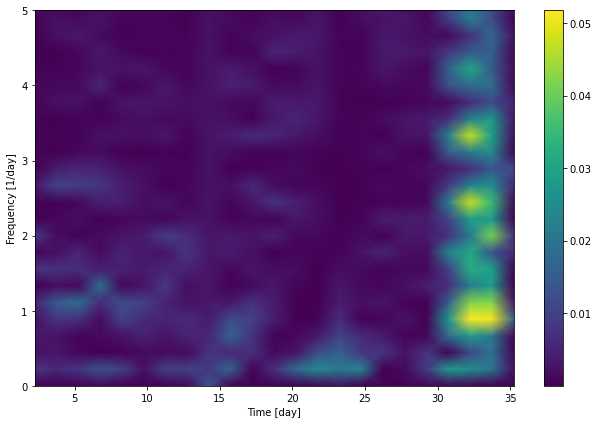

In [106]:
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
# cmap = mpl.colormaps['viridis']

fig,ax0 = plt.subplots(1, 1)
fig.set_figheight(fig.get_figheight()*1.5)
fig.set_figwidth(fig.get_figwidth()*1.5)
fig.set_tight_layout(True)


nperseg_1 = int(240*4.5)
noverlap_1 = 240*3
fs= 1/( 6 / (24*60))
f, t, Sxx = signal.spectrogram(np.array(np.array(media-df["gravity_corr (m/s2)"][0+move_area:max_range-240*0])) , fs,\
                               nperseg = nperseg_1,noverlap=noverlap_1)


for i in range(len(t)):
    Sxx[:,i]=Sxx[:,i]/sum(Sxx[:,i])
z = Sxx[:, :]
levels = MaxNLocator(nbins=256).tick_values(z.min(), z.max())

cmap = cm.hot
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


print(len(f))
freq = fftfreq(nperseg_1, dt)[:nperseg_1//2] 
print(len(freq ))
im = ax0.pcolormesh(t[:], f , Sxx[:,:], shading='gouraud')#, cmap=cmap, norm=norm, shading='gouraud')

ax0.set_ylabel('Frequency [1/day]')
ax0.set_xlabel('Time [day]')
ax0.set_ylim(0,5)

fig.colorbar(im, ax=ax0)
# ax0.savefig('sp.pdf')
# ax0.show()

In [102]:
df['time'][max_range]-df['time'][0]

Timedelta('38 days 19:05:59')

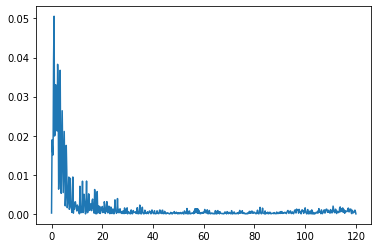

In [88]:
plt.plot(f, Sxx[:,30])

In [67]:
sum(Sxx[:,1])
Sxx[1,1]

0.005708813825041939

In [34]:
Sxx

array([[1.97818673e-03, 6.87298643e-03, 8.11242100e-04, ...,
        5.99941709e-03, 4.19295979e-04, 2.83766332e-07],
       [1.14269594e-01, 3.52190107e-02, 5.04450398e-02, ...,
        4.79397681e-01, 1.77533645e-02, 1.06463609e-02],
       [4.23997373e-03, 3.47927657e-02, 1.45964398e-02, ...,
        4.43011365e-01, 6.87253812e-03, 8.83025013e-03],
       ...,
       [1.01920343e-02, 1.19807506e-03, 5.21382652e-03, ...,
        3.64667826e-02, 4.80539417e-02, 3.49127917e-02],
       [6.54285683e-03, 9.53681735e-03, 3.05899670e-02, ...,
        5.35940746e-02, 5.24922929e-02, 4.18698242e-02],
       [2.64286450e-03, 1.04062542e-02, 2.59549882e-02, ...,
        4.14529915e-03, 2.40343740e-03, 1.11111167e-02]])